In [1]:
import json
import matplotlib.pyplot as plt

In [56]:
def plot(optimization, baseline_stats, optimization_stats, max_epochs):

    plt.figure(figsize=(10, 5))
    
    label = {baseline_stats: "ViT Baseline", optimization_stats: f"ViT {optimization}"}
    
    for filename in [baseline_stats, optimization_stats]:
        with open(filename, 'r') as file:
            data = json.load(file)
            
            epoch = sorted([int(i) for i in list(data.keys())])[:max_epochs]
            acc = [data[str(i)] for i in epoch]
                
            plt.plot(epoch, acc, linewidth=1.5, label=label[filename])

    plt.xlabel('Epochs')
    plt.ylabel('Train Accuracy')
    plt.title('ViT-Baseline vs ViT DeCatt')
    plt.legend()
    plt.show()

## DeCatt Loss

### CIFAR10

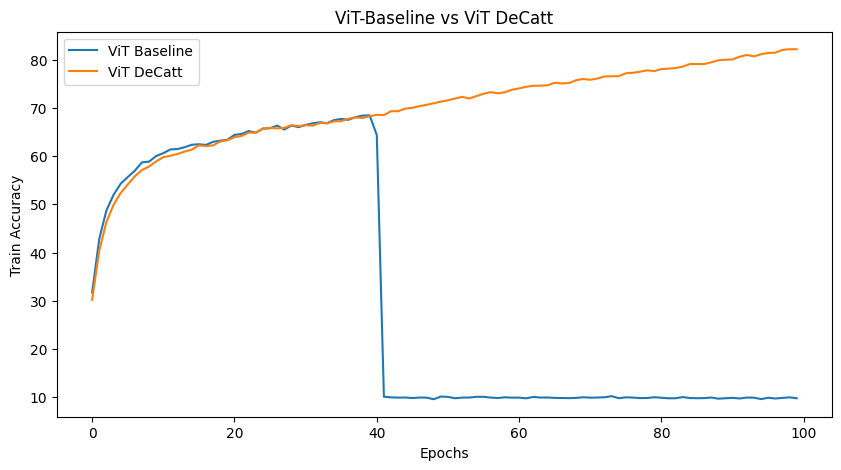

In [57]:
plot("DeCatt", "stats/vit_baseline_cifar10_trainacc.txt", "stats/vit_decatt_cifar10_trainacc.txt", 100, trainacc=True)

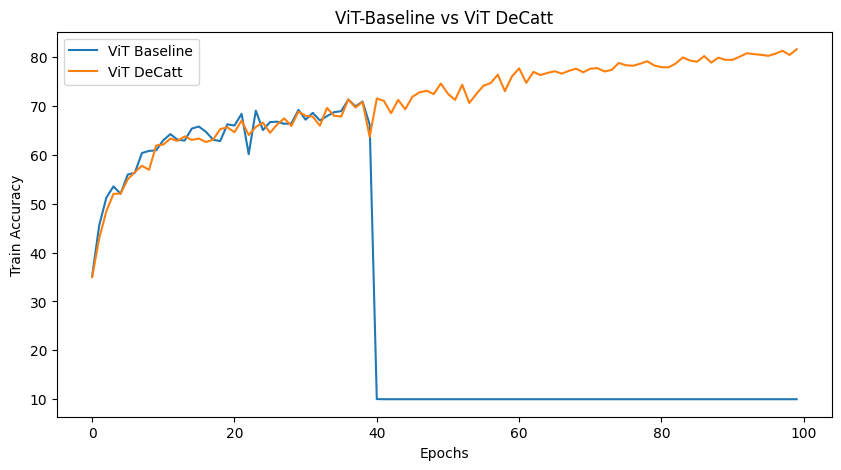

In [58]:
plot("DeCatt", "stats/vit_baseline_cifar10_valacc.txt", "stats/vit_decatt_cifar10_valacc.txt", 100)

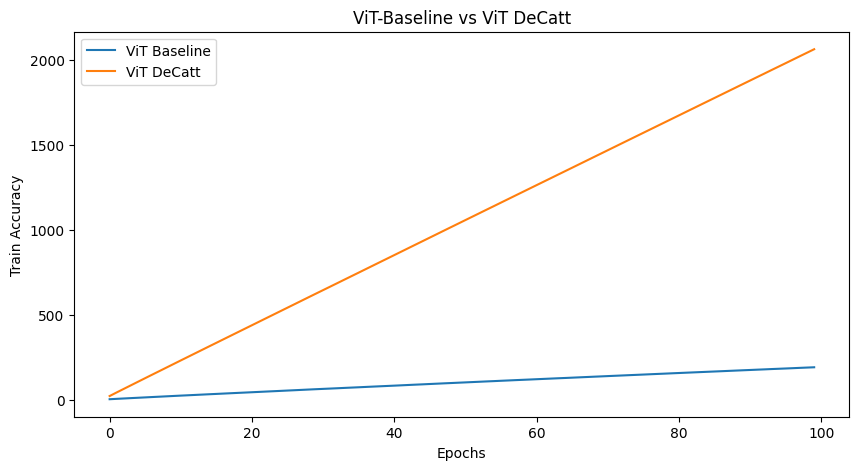

In [61]:
plot("DeCatt", "stats/vit_baseline_cifar10_trainloss.txt", "stats/vit_decatt_cifar10_trainloss.txt", 100)